In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import matplotlib.pyplot as plt

## PART 1: TOTAL COVID CASES PROJECTION

In [2]:
df=pd.read_csv("//Users/howardyan/Desktop/Data Toolbox/Time Series Projects/Facebook Prophet/us.csv")

In [3]:
df=df[['date','deaths']]

In [4]:
df

,date,deaths
0,2020-01-21,0
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0
...,...,...
705,2021-12-26,814970
706,2021-12-27,816707
707,2021-12-28,819201
708,2021-12-29,821302


In [5]:
df=df.set_index('date').diff()

In [6]:
df=df[~np.isnan(df['deaths'])]

In [7]:
df

,deaths
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2021-12-26,79.0
2021-12-27,1737.0
2021-12-28,2494.0


In [8]:
df=df.rename(columns={'date':'ds','deaths':'y'})

In [9]:
df

,y
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2021-12-26,79.0
2021-12-27,1737.0
2021-12-28,2494.0


In [10]:
df['ds']=df.index

In [270]:
model=Prophet(growth='linear',interval_width=0.95,daily_seasonality=False,yearly_seasonality=True).add_seasonality(name='semester',period=30,fourier_order=5)

In [271]:
projection=model.fit(df)

Initial log joint probability = -16.2989
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1133.94    0.00997918        232.98      0.7611      0.7611      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1158.9   6.71351e-05       82.5861      0.3671           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       1158.94   0.000111329       70.9763   1.101e-06       0.001      341  LS failed, Hessian reset 
     299       1158.95   5.02748e-07        91.696           1           1      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       1160.77    0.00909746       358.106   8.103e-05       0.001      520  LS failed, Hessian reset 
     383        1162.5   0.000435604       64.4021   4.933e-06       0.001      600  LS failed, Hessian rese

In [272]:
## Forecasting

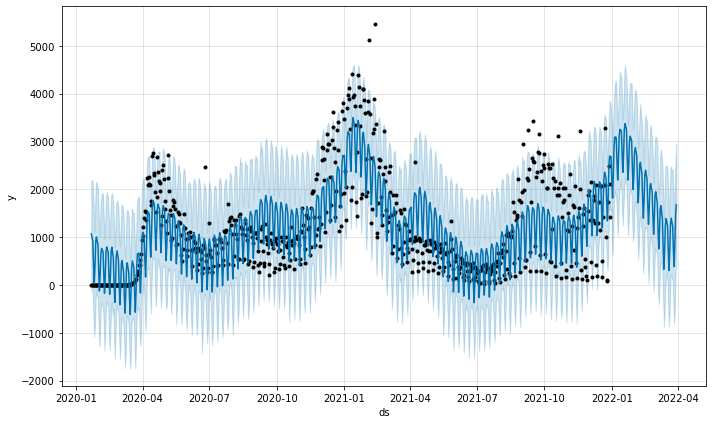

In [273]:
future=model.make_future_dataframe(periods=90,freq='d')
forecast=model.predict(future)
model.plot(forecast);

In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,semester,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
713,2022-04-30,1723.241508,-182.311328,2090.192550,1356.735251,2116.730328,-740.568974,-740.568974,-740.568974,2266.653279,...,-265.803042,-265.803042,-265.803042,-2741.419212,-2741.419212,-2741.419212,0.0,0.0,0.0,982.672534
714,2022-05-31,1763.420971,-656.802952,1685.731200,1259.378474,2318.143986,-1259.689108,-1259.689108,-1259.689108,-23.447066,...,257.280126,257.280126,257.280126,-1493.522168,-1493.522168,-1493.522168,0.0,0.0,0.0,503.731864
715,2022-06-30,1802.304323,-800.141297,1605.308994,1150.785381,2528.308263,-1458.672398,-1458.672398,-1458.672398,-4058.781928,...,319.408662,319.408662,319.408662,2280.700867,2280.700867,2280.700867,0.0,0.0,0.0,343.631925
716,2022-07-31,1842.483786,11.175316,2700.639705,1002.184451,2722.838360,-466.791946,-466.791946,-466.791946,-2586.302331,...,-664.936314,-664.936314,-664.936314,2784.446699,2784.446699,2784.446699,0.0,0.0,0.0,1375.691841
717,2022-08-31,1882.663250,1618.359139,4561.805814,757.124003,2961.359452,1216.291066,1216.291066,1216.291066,999.496305,...,384.233554,384.233554,384.233554,-167.438793,-167.438793,-167.438793,0.0,0.0,0.0,3098.954316


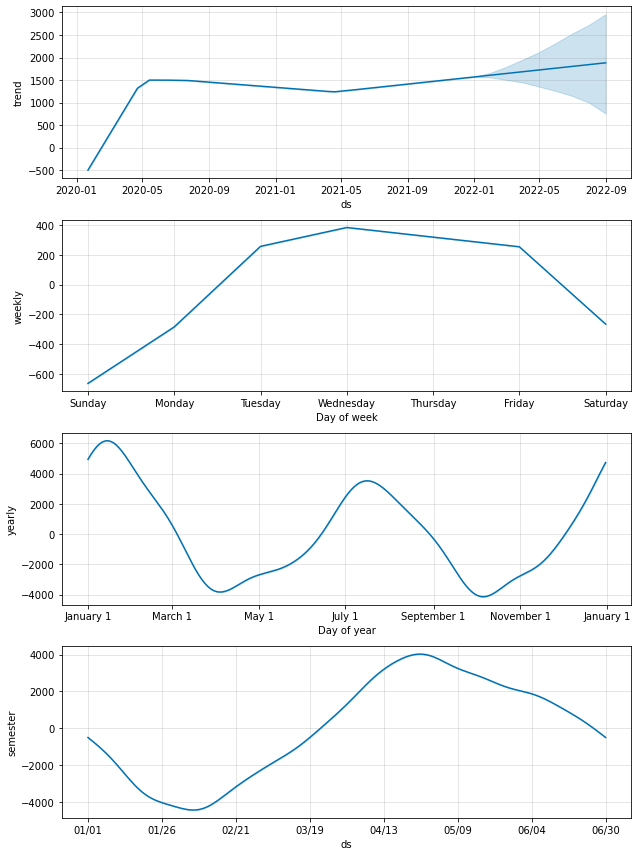

In [16]:
model.plot_components(forecast);

## PART 2: DAILY COVID CASES PROJECTION

In [275]:
daily=pd.read_csv("/Users/howardyan/Desktop/Data Toolbox/Time Series Projects/Facebook Prophet/us.csv")

In [276]:
daily=daily.set_index('date').diff()

In [277]:
daily=daily[~np.isnan(daily['cases'])]

In [278]:
daily

,cases,deaths
date,,
2020-01-22,0.0,0.0
2020-01-23,0.0,0.0
2020-01-24,1.0,0.0
2020-01-25,1.0,0.0
2020-01-26,2.0,0.0
...,...,...
2021-12-26,189714.0,79.0
2021-12-27,543415.0,1737.0
2021-12-28,380751.0,2494.0


In [279]:
daily=daily.rename(columns={'date':'ds','cases':'y'})

In [280]:
daily=daily[['y']]

In [281]:
daily['ds']=daily.index

In [282]:
daily

,y,ds
date,,
2020-01-22,0.0,2020-01-22
2020-01-23,0.0,2020-01-23
2020-01-24,1.0,2020-01-24
2020-01-25,1.0,2020-01-25
2020-01-26,2.0,2020-01-26
...,...,...
2021-12-26,189714.0,2021-12-26
2021-12-27,543415.0,2021-12-27
2021-12-28,380751.0,2021-12-28


In [283]:
daily=daily[daily['ds']>'2021-02-01']

In [284]:
model=Prophet(seasonality_mode='additive',interval_width=0.95,daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=True).add_seasonality(name='monthly',period=20,fourier_order=4)

In [285]:
daily_projection=model.fit(daily)

Initial log joint probability = -44.0226
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       696.218   0.000417305        90.893      0.1939           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       696.261   2.09463e-05        101.49   2.065e-07       0.001      207  LS failed, Hessian reset 
     167       696.262   8.32948e-09        100.73      0.3399      0.3399      244   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


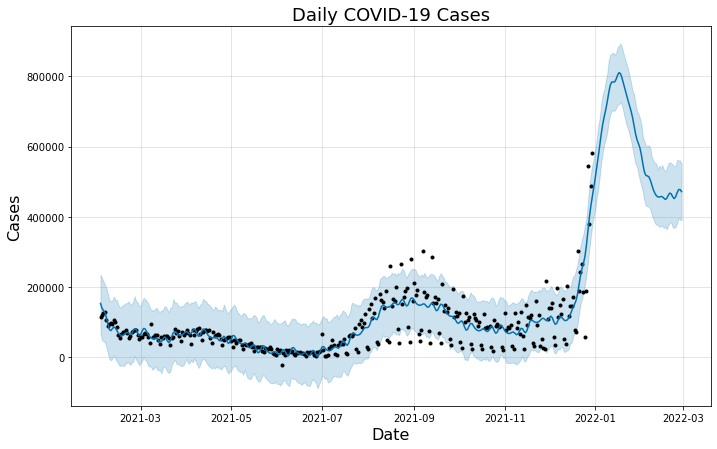

In [286]:
daily_future=model.make_future_dataframe(periods=60,freq='d')
daily_forecast=model.predict(daily_future)
model.plot(daily_forecast);
plt.xlabel('Date',size=16)
plt.ylabel('Cases',size=16)
plt.title('Daily COVID-19 Cases',size=18);

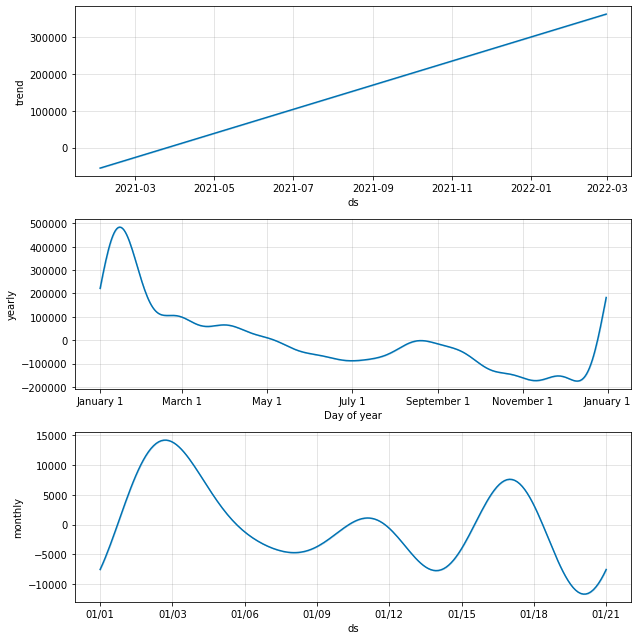

In [287]:
model.plot_components(daily_forecast);

## How accurate is my model? I use the Mean Absolute Percentage Error (MAPE)

In [29]:
## How to implement cross validation 
## Source: https://stackoverflow.com/questions/63780573/trying-to-understand-fb-prophet-cross-validation

In [30]:
def MAPE(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/(y_true))*100)

In [246]:
cross=cross_validation(model,initial='30 days',period='10 days',horizon='10 days')

INFO:fbprophet:Making 30 forecasts with cutoffs between 2021-03-05 00:00:00 and 2021-12-20 00:00:00


  0%|          | 0/30 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 24.



Initial log joint probability = -71.9064
Iteration  1. Log joint probability =    30.9292. Improved by 102.836.
Iteration  2. Log joint probability =    39.8329. Improved by 8.9037.
Iteration  3. Log joint probability =    69.6962. Improved by 29.8633.
Iteration  4. Log joint probability =    84.6558. Improved by 14.9595.
Iteration  5. Log joint probability =    89.1385. Improved by 4.48272.
Iteration  6. Log joint probability =    94.1409. Improved by 5.00241.
Iteration  7. Log joint probability =    96.8533. Improved by 2.71242.
Iteration  8. Log joint probability =    97.3199. Improved by 0.466529.
Iteration  9. Log joint probability =    97.3629. Improved by 0.043079.
Iteration 10. Log joint probability =     97.457. Improved by 0.094098.
Iteration 11. Log joint probability =    97.5006. Improved by 0.0436017.
Iteration 12. Log joint probability =    97.5417. Improved by 0.0410179.
Iteration 13. Log joint probability =    97.5833. Improved by 0.0416648.
Iteration 14. Log joint pro


Initial log joint probability = -97.6242
Iteration  1. Log joint probability =    57.6892. Improved by 155.313.
Iteration  2. Log joint probability =    75.7668. Improved by 18.0776.
Iteration  3. Log joint probability =    94.1093. Improved by 18.3425.
Iteration  4. Log joint probability =    114.728. Improved by 20.6186.
Iteration  5. Log joint probability =    128.601. Improved by 13.873.
Iteration  6. Log joint probability =    133.738. Improved by 5.13706.
Iteration  7. Log joint probability =     134.22. Improved by 0.482499.
Iteration  8. Log joint probability =    134.515. Improved by 0.294721.
Iteration  9. Log joint probability =    135.111. Improved by 0.595658.
Iteration 10. Log joint probability =    135.145. Improved by 0.0341596.
Iteration 11. Log joint probability =    135.165. Improved by 0.0199717.
Iteration 12. Log joint probability =    135.188. Improved by 0.0232993.
Iteration 13. Log joint probability =    135.192. Improved by 0.00365543.
Iteration 14. Log joint 


Initial log joint probability = -125.844
Iteration  1. Log joint probability =    81.0413. Improved by 206.886.
Iteration  2. Log joint probability =    107.912. Improved by 26.8708.
Iteration  3. Log joint probability =    150.026. Improved by 42.1142.
Iteration  4. Log joint probability =    176.962. Improved by 26.9358.
Iteration  5. Log joint probability =    185.282. Improved by 8.31994.
Iteration  6. Log joint probability =    187.633. Improved by 2.35054.
Iteration  7. Log joint probability =    188.014. Improved by 0.381381.
Iteration  8. Log joint probability =    188.463. Improved by 0.449547.
Iteration  9. Log joint probability =    188.882. Improved by 0.418068.
Iteration 10. Log joint probability =    189.105. Improved by 0.223074.
Iteration 11. Log joint probability =    189.137. Improved by 0.0326303.
Iteration 12. Log joint probability =    189.505. Improved by 0.367525.
Iteration 13. Log joint probability =    189.648. Improved by 0.14325.
Iteration 14. Log joint prob

Initial log joint probability = -23.01
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       350.862   1.39229e-08       101.964      0.3555           1      121   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -6.01316
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       391.082   0.000137588       100.758           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       391.092   9.42252e-09       101.786      0.3595      0.3595      171   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance
Initial log joint probability = -19.6146
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66        388.85   0.000244476   

In [247]:
MAPE(cross.y,cross.yhat)

124.09841594171125

In [248]:
performance_metrics(cross)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,2.503878e+09,50038.760236,35903.214699,0.818950,0.335357,0.540843,0.566667
1,2 days,2.791144e+09,52831.276763,40905.871429,0.954703,0.475463,0.611916,0.566667
2,3 days,2.362187e+09,48602.334519,39250.921553,0.783296,0.392439,0.626252,0.600000
3,4 days,3.887765e+09,62351.947286,44357.053832,0.885366,0.403757,0.663908,0.666667
4,5 days,6.211191e+09,78811.111239,51457.346797,1.011168,0.604766,0.701446,0.566667
5,6 days,8.610482e+09,92792.680893,50769.228685,0.883256,0.409850,0.615986,0.600000
6,7 days,1.704692e+10,130563.851353,63630.657728,1.057984,0.420296,0.660144,0.633333
7,8 days,2.633937e+10,162294.091777,89652.985556,1.677286,0.789646,0.878619,0.433333
8,9 days,4.122930e+10,203050.005608,104924.817405,2.093041,0.737551,0.905033,0.366667
9,10 days,6.263740e+10,250274.645178,128017.772423,2.244791,0.768417,0.997385,0.366667


/opt/anaconda3/lib/python3.8/site-packages/prophet/plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/opt/anaconda3/lib/python3.8/site-packages/prophet/plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


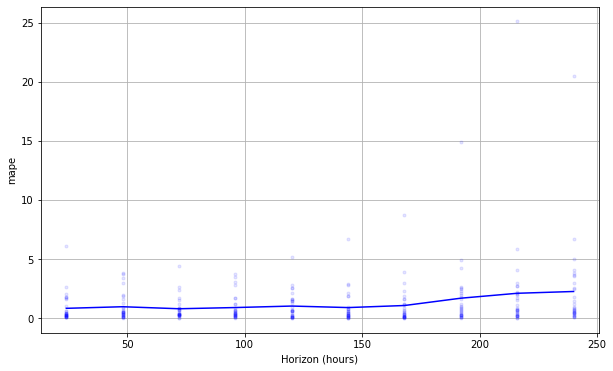

In [249]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cross, metric='mape')